# About
This notebook compares predictions for randomly selected sequences as described and biophysically quantified by Tretyachenko et al. We focus here on the 22 sequences the authors were able to express and quantify via CD spectroscopy. 

Tretyachenko, V., Vymětal, J., Bednárová, L., Kopecký, V., Jr, Hofbauerová, K., Jindrová, H., Hubálek, M., Souček, R., Konvalinka, J., Vondrášek, J. & Hlouchová, K. Random protein sequences can form defined secondary structures and are well-tolerated in vivo. Sci. Rep. 7, 15449 (2017).
  


In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

In [2]:
import metapredict as meta
import protfasta 

metapredict_version = 3

In [3]:
def calculate_mcc(TP,TN,FP,FN):
    a = (TP*TN) - (FP*FN)
    b = (TP+FP)*(TP+FN)*(TN+FP)*(TN+FN)
    
    return a / np.sqrt(b)

In [4]:
D = protfasta.read_fasta('data/tretyachenko.fasta')

In [5]:
ordered = []
disordered = []

ordered_names = []
disordered_names = []

ordered_seqs = {}
disordered_seqs = {}


for k in D:
    if k.split('_')[1] == 'IDR':
        
        fraction_idr = np.sum([len(x) for x in meta.predict_disorder_domains(D[k],version=metapredict_version).disordered_domains])/len(D[k])
        
        disordered.append(fraction_idr)
        disordered_names.append(k.split('_')[0])
        disordered_seqs[k.split('_')[0]] = D[k]
        
    if k.split('_')[1] == 'ORD':
        
        fraction_idr = np.sum([len(x) for x in meta.predict_disorder_domains(D[k], version=metapredict_version).disordered_domains])/len(D[k])
        
        ordered.append(fraction_idr)        
        ordered_names.append(k.split('_')[0])
        ordered_seqs[k.split('_')[0]] = D[k]
        
        

MCC = 0.821020142307163


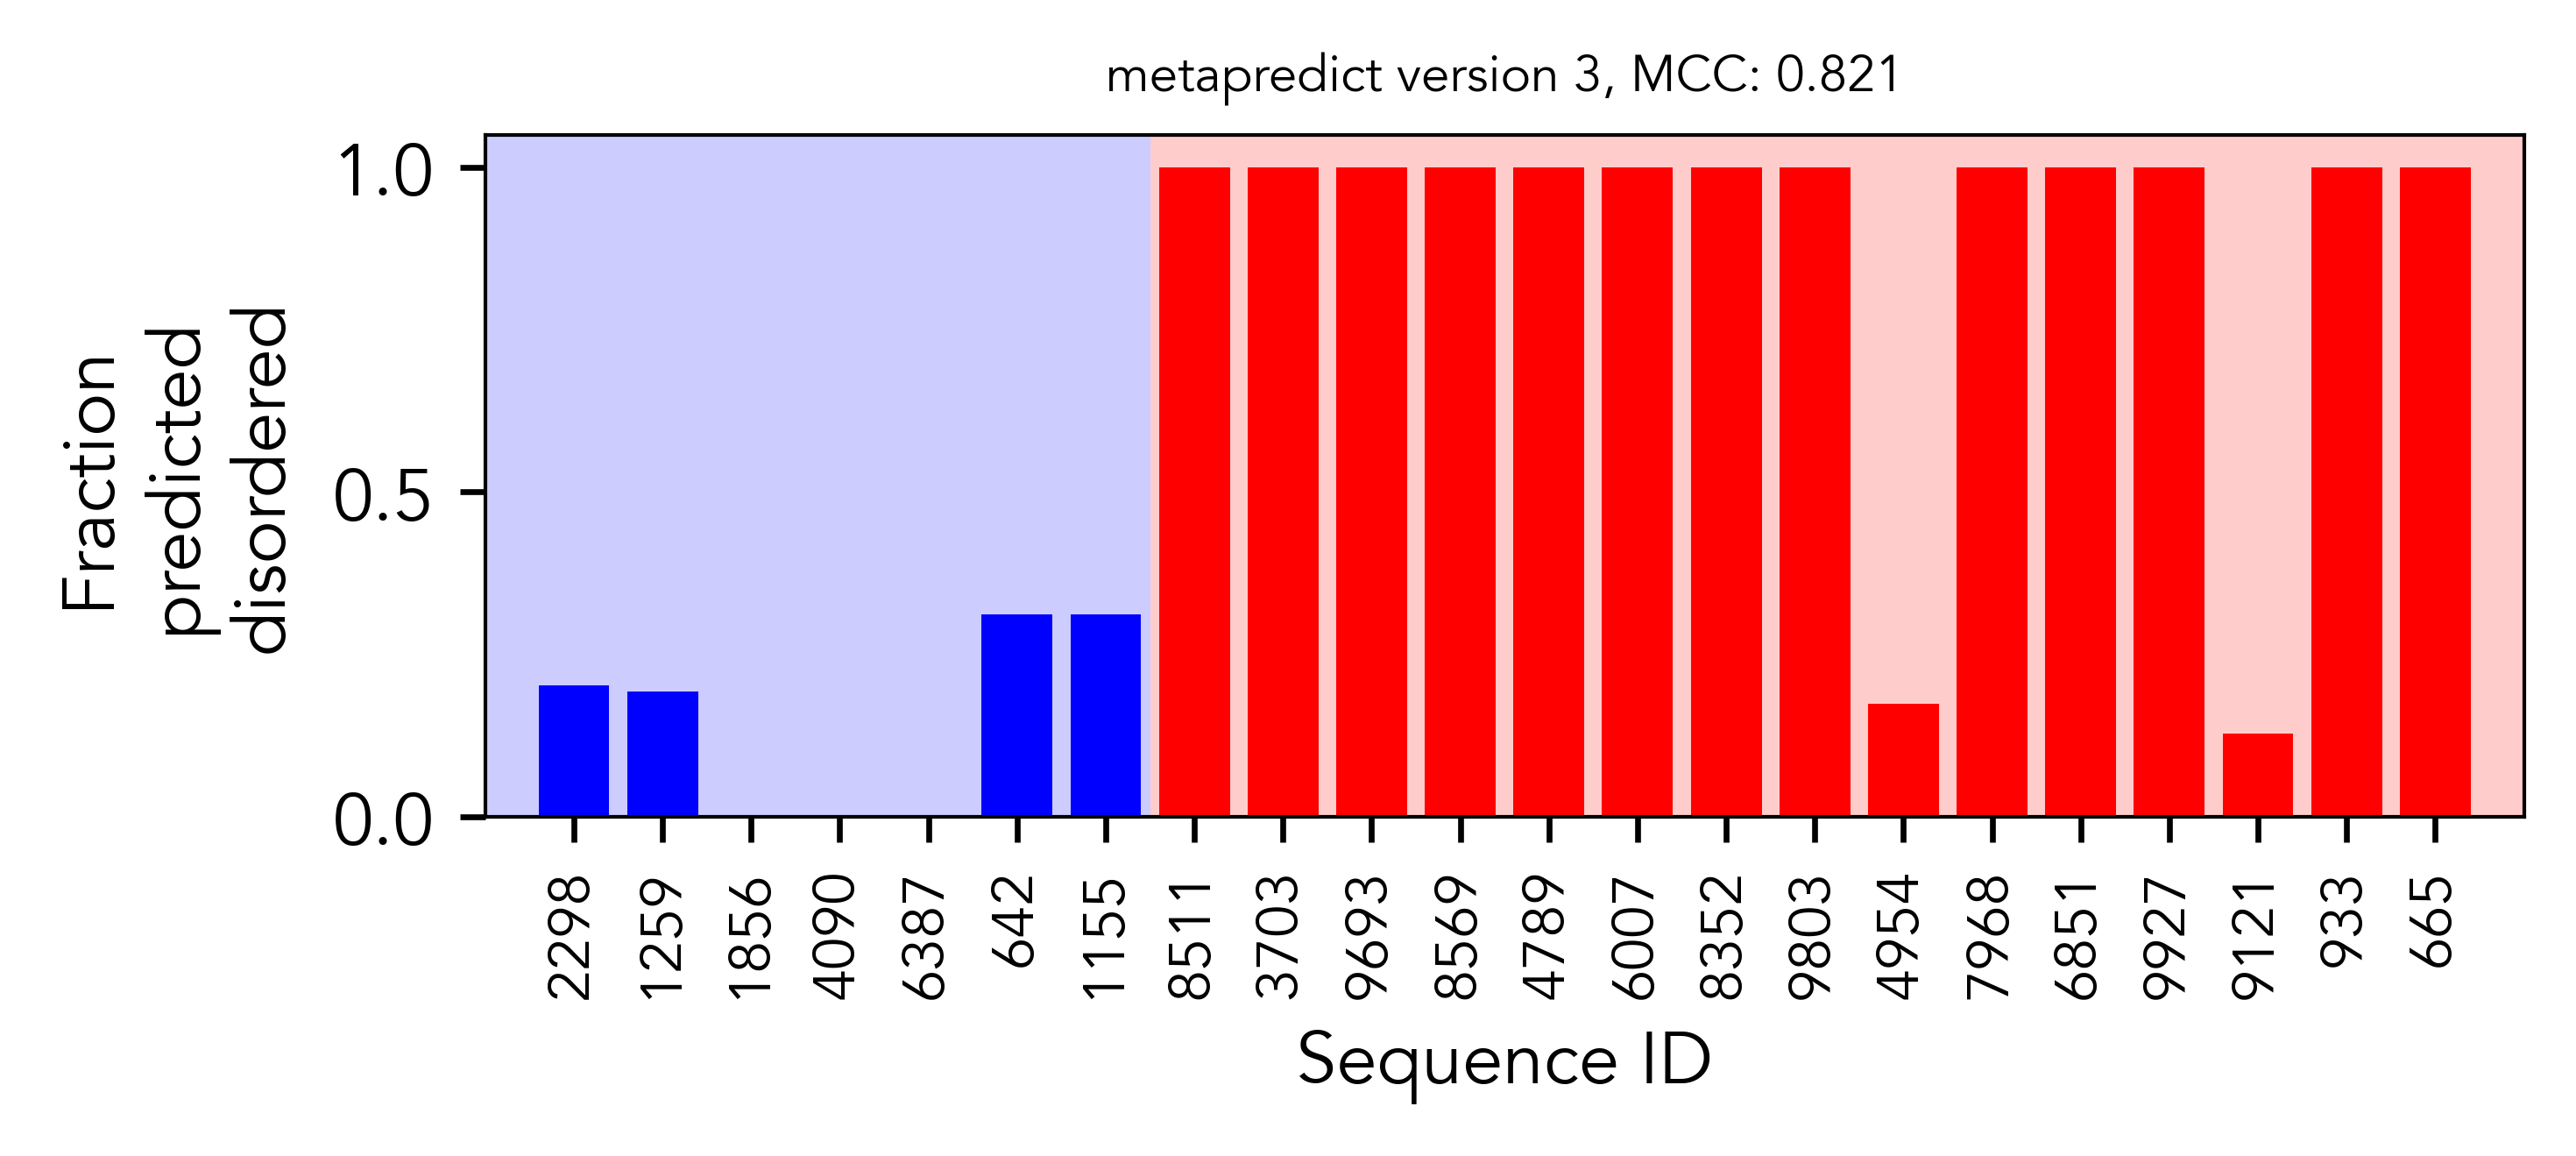

In [6]:

figure(num=None, figsize=(5, 2.3), dpi=300, facecolor='w', edgecolor='k')
ax = plt.gca()

plt.bar(np.arange(1,len(ordered)+1), ordered, color='b')
plt.bar(np.arange(len(ordered)+1, len(ordered)+1+len(disordered)), disordered, color='r')

plt.xlabel('Sequence ID')
plt.ylabel('Fraction\npredicted\ndisordered')
names = ordered_names.copy()
names.extend(disordered_names)
plt.xticks(np.arange(1,len(ordered)+len(disordered)+1),names, rotation=90, fontsize=8) 
ax.axvspan(7.5,23,color='r',alpha=0.2,linewidth=0)
ax.axvspan(0,7.5,color='b',alpha=0.2,linewidth=0)
plt.xlim([0,23])


TP = 0
TN = 0
FP = 0
FN = 0

for i in ordered:
    if i > 0.5:
        FP = FP +1
    else:
        TN = TN + 1

for i in disordered:
    if i > 0.5:
        TP = TP +1
    else:
        FN = FN + 1
        
print(f"MCC = {calculate_mcc(TP,TN,FP,FN)}")    

mcc = calculate_mcc(TP,TN,FP,FN)

plt.title(f'metapredict version {metapredict_version}, MCC: {round(mcc,3)}', fontsize=7)
plt.tight_layout()
plt.savefig(f'figures/tretyachenko_metapredict_version_{metapredict_version}.pdf')



In [42]:
disordered_seqs

{'8511': 'MATDHIDDPGILAAFPAGTCLLDDKGKTSGATFAPASEEDIEGNPTGAAGDNLAYGEPTAYYSFINQPKEISGRQSSESSQHERVQMAERDYDDFTDQPTGLEHHHHHH',
 '3703': 'MSLYKFGQRRAVDPLPRQCQRDKDYDAFIGGEQNCDNELSKSFPIVVMSVFLYDPTYNVDSEAQDNKLDHHGSEPTHGDTPTTSEDTRPGSDRVMRDVPQTLEHHHHHH',
 '9693': 'MMNGERSLIPDSMKSISAVRLIICGLIKPATAGLKEVDMHVWPNPTSLAGHSVSLYSSGKQISNLAFGDEESPNRERETAPADEDVIPDAHDTSDSLDGEHLEHHHHHH',
 '8569': 'MPQGVDNLVISWQAGEEGKNAGFIMGYLGVVGIDALDYQNDPAQHYNDAQHDKKENYYHKGNPKPAELDAEGLGSEEPALPDHSPKVEELSIPDMYRPEQYLEHHHHHH',
 '4789': 'MQGDFNPEPGRSSNTSPRRYRIDEPGIRKSGAPLDRDVSDEASSHVNYPAVSEIPDFEDDFTGDIPIGPADKQLVETDGHNGQLDLGLNWDDIASLIIFKILEHHHHHH',
 '6007': 'MGHPELEEHDVQTNKEHHTNSQINLSTEVDLEPMGHKIDYPLANYVSPRNDYLPIFTISFMGFGGGRATPKETNVIAGTDPYKFTVSQSEDDLHGIADPRLLEHHHHHH',
 '8352': 'MNREAEWLREPLPKYYDFAGTYNTRMTEWGDKALTTVVVGTLYQVEEPPGLTPASPMQHGACNAYNSELGFTQNEGALKQEMPVIPGGGSDPERRGLADPDLEHHHHHH',
 '9803': 'MEVGHKAFPRSMEDTSDKVQLIAPGEINMFTSGYEDNPMVMVKNNFEGDTKFHSDDVPIENMDDEAEDAPYLNVGNGRLVYTTDPDGLDATLETPGYLEDGLEHHHHHH',
 '4954': 'MRVIGLSESPFDPA

## Create input for AF3
This didn't end up being useful, so we don't include a discussion of it in the MS, but figured we should keep the code here for convenience!

In [7]:
import json

# Create a list to store the JSON objects for each sequence
json_data = []

# Iterate through the dictionary and create the JSON structure
for name, sequence in disordered_seqs.items():
    json_object = {
        "name": name,
        "modelSeeds": [],  # Empty list for model seeds
        "sequences": [
            {
                "proteinChain": {
                    "sequence": sequence,
                    "count": 1
                }
            }
        ]
    }
    json_data.append(json_object)

# Save the list of JSON objects to a file
with open("alphafold_input.json", "w") as json_file:
    json.dump(json_data, json_file, indent=4)
